#scholar.google.co.kr 에서 siheung을 검색한 결과를 크롤링하여 500개를 따오고 이를 히스토그램과 word cloud로 나타냄

##

In [19]:
#일단 크롤링을 통해 영문논문 제목을 가져옴

from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np
import re
import requests

session = requests.Session()

title = [] #논문 제목

result = pd.DataFrame()  # 결과저장용 DataFrame
pagenum = 0

while(pagenum < 10):  # 결과가 100개 넘어야 함.
    url = 'https://scholar.google.co.kr/scholar?start=argu&q=siheung'
    url = url.replace('argu', str(pagenum))  # 페이지 1에대한 경우 이후 이는 변수로 처리할 것.

    pagenum = pagenum + 1 #다음페이지 준비
    #html = urllib.request.urlopen(url)
    page = session.get(url)
    c = page.content
    soup = BeautifulSoup(c, 'html.parser')

    mydivs = soup.findAll("div", { "class" : "gs_r" })

    for div in mydivs:
        try:
            title.append(div.find('h3').find('a').text)
            #print(title)
        except:
            print("sda")



sda
sda
sda
sda
sda
sda
sda
sda
sda
sda
sda


In [20]:
import string
title_sep = []
for line in title:
    #print(type(line))
    sep_line = line.split()
    #print(sep_line)
    title_sep.append(sep_line)

In [21]:
from functools import reduce
title_sep #2차원 배열

words = list(reduce(lambda x, y: x+y, title_sep))
#Counter(words)

In [22]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [23]:
re_words = [] 
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()


for word in words: 
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(word)) 
    EnWords = EnWords.lower()
    EnWordsToken = word_tokenize(EnWords.lower()) 
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] 
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]         

    re_words.append(EnWordsTokenStopLemma)


In [24]:
len(re_words)
re_word = list(reduce(lambda x, y: x+y, re_words))

#Counter(re_word)

In [25]:
count = Counter(re_word)

word_count = dict()

for tag, counts in count.most_common(50):
   if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))


siheung : 61
study : 28
city : 22
bone : 17
community : 16
using : 16
smartphone : 16
light : 14
korea : 12
dietary : 12
physical : 12
excavated : 11
analysis : 11
elementary : 10
school : 10
student : 10
achievement : 10
design : 10
participant : 10
focused : 10
derived : 9
decellularized : 9
extracellular : 9
matrix : 9
characteristic : 9
efficiency : 9
improvement : 9
deep : 9
ultraviolet : 9
emitting : 9
diode : 9
gradient : 9
electron : 9
blocking : 9
layer : 9
topography : 9
exposure : 9
duration : 9
tidal : 9
flat : 9
remote : 9
sensing : 9
technique : 9
anthropological : 8
cultural : 8
remains : 8
usage : 8
related : 8
habit : 8
according : 8


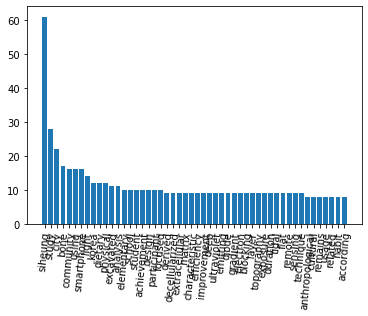

In [39]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.savefig('histo.png', dpi=300, facecolor='#eeeeee',pad_inches=0.8)
plt.show()




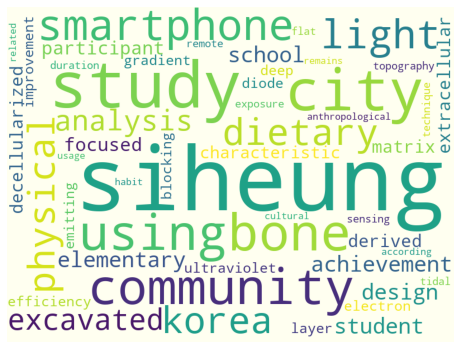

In [35]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.savefig('text.png')
plt.show()

